In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


(a) Numerical Summaries:
              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.0

<Figure size 1200x800 with 0 Axes>

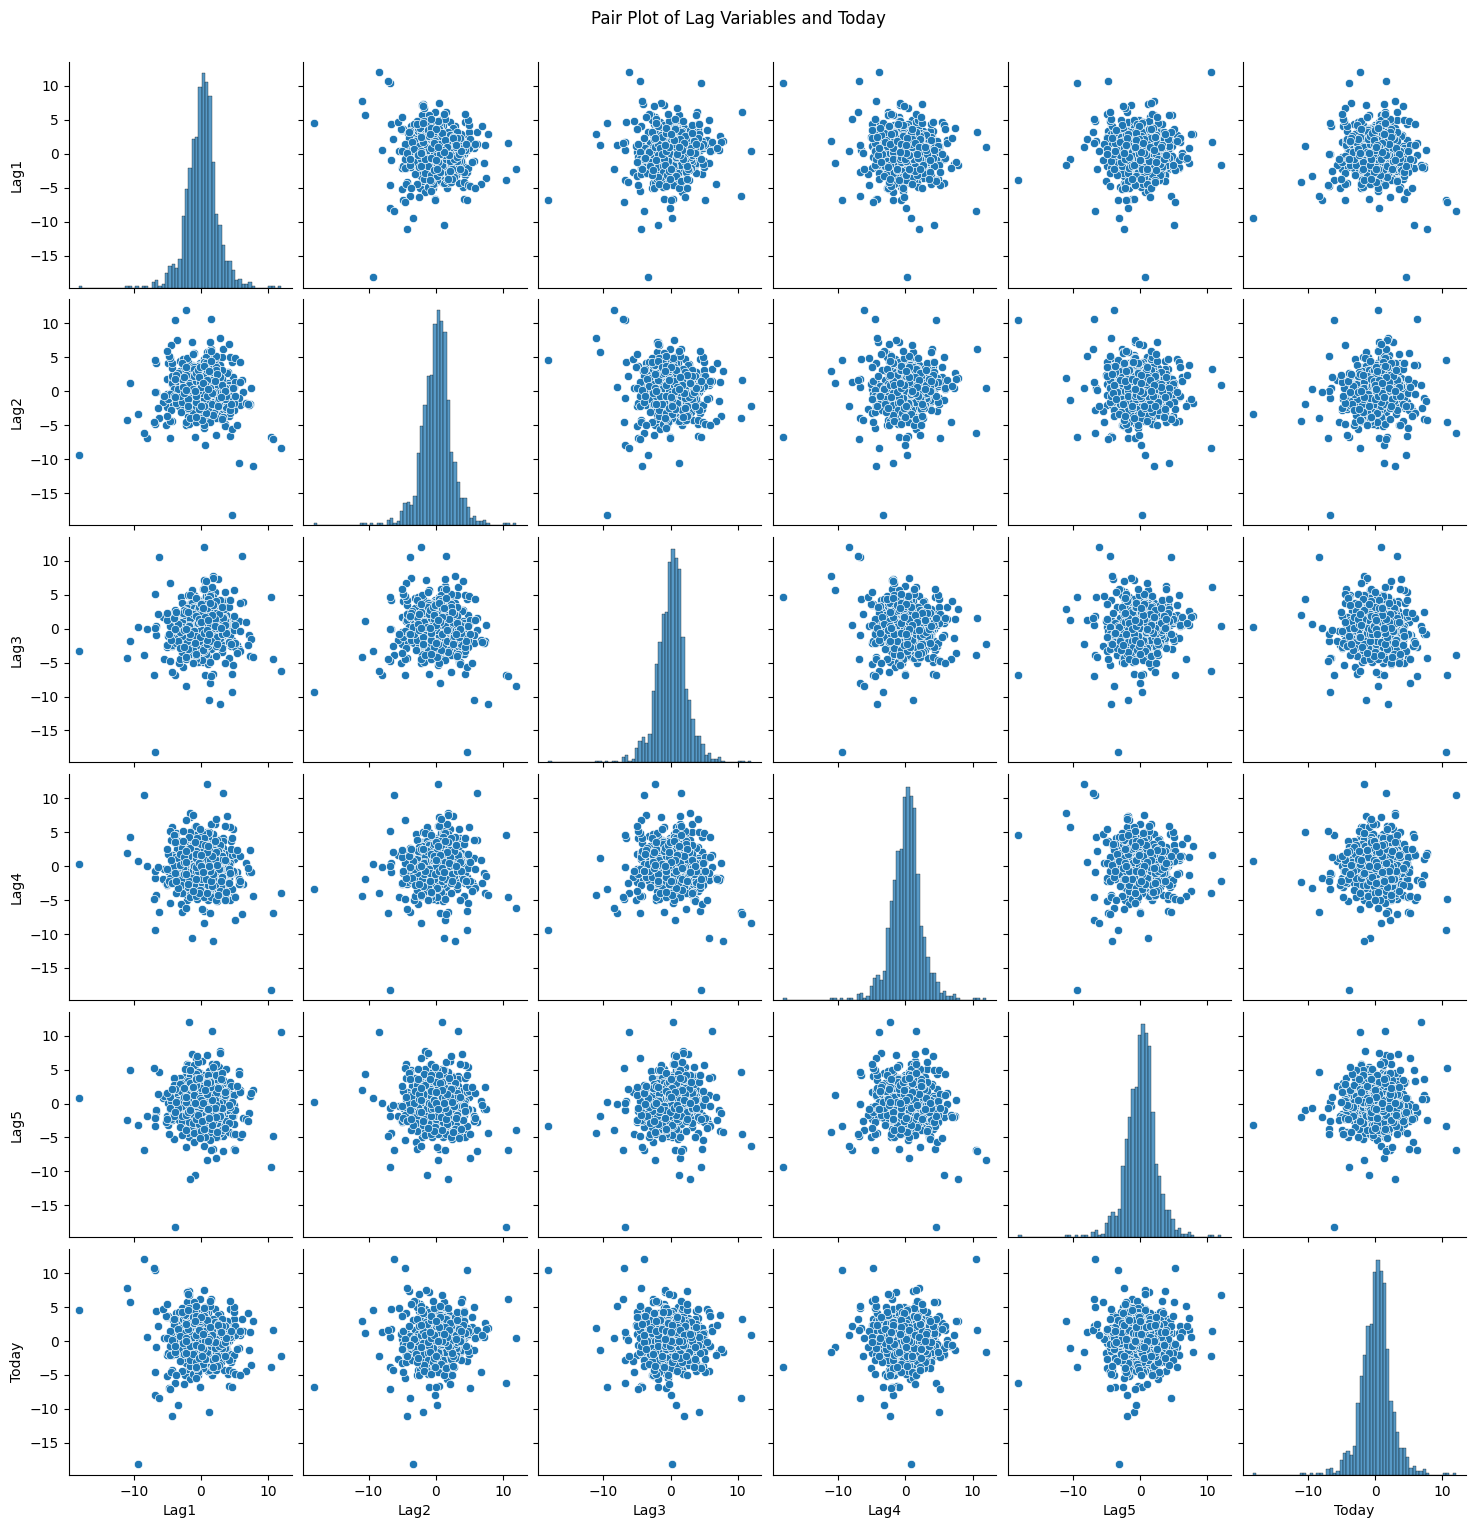

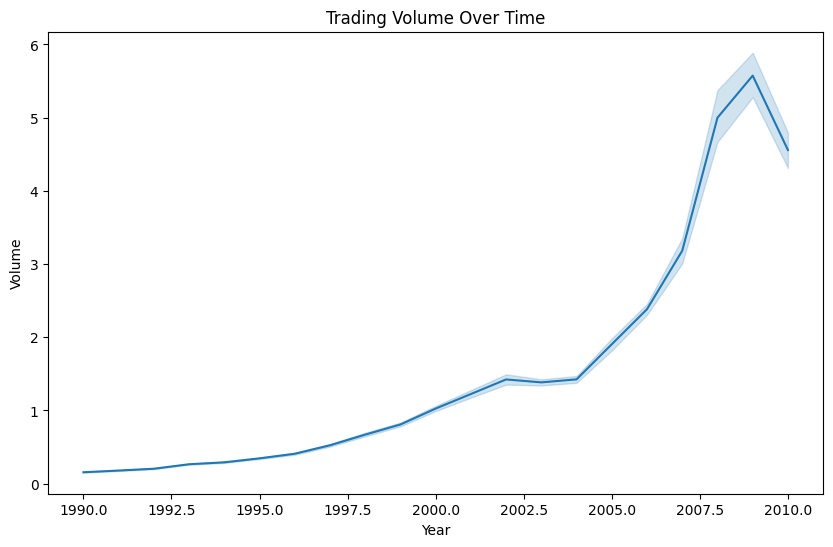

In [ ]:
# Load data
df = pd.read_csv('/content/sample_data/Weekly.csv')

# (a) Numerical and graphical summaries
print("(a) Numerical Summaries:")
print(df.describe())
print("\nDirection Distribution:")
print(df['Direction'].value_counts(normalize=True))

# Graphical summaries
plt.figure(figsize=(12,8))
sns.pairplot(df[['Lag1','Lag2','Lag3','Lag4','Lag5','Today']])
plt.suptitle('Pair Plot of Lag Variables and Today', y=1.02)
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Volume', data=df)
plt.title('Trading Volume Over Time')
plt.show()

In [ ]:
# (b) Logistic Regression with all predictors
X = df[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
y = df['Direction']
logit_full = LogisticRegression()
logit_full.fit(X, y)
print("\n(b) Logistic Regression Coefficients:")
print(pd.DataFrame({'Feature':X.columns, 'Coefficient':logit_full.coef_[0]}))


(b) Logistic Regression Coefficients:
  Feature  Coefficient
0    Lag1    -0.041234
1    Lag2     0.058392
2    Lag3    -0.016041
3    Lag4    -0.027779
4    Lag5    -0.014453
5  Volume    -0.022739


In [ ]:
# (c) Confusion matrix for full model
y_pred = logit_full.predict(X)
print("\n(c) Full Data Confusion Matrix:")
print(confusion_matrix(y, y_pred))
print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")


(c) Full Data Confusion Matrix:
[[ 54 430]
 [ 48 557]]
Accuracy: 0.5611


In [ ]:
# (d) Logistic Regression with training data (1990-2008)
train = df[df['Year'] < 2009]
test = df[df['Year'] >= 2009]

X_train = train[['Lag2']]
y_train = train['Direction']
X_test = test[['Lag2']]
y_test = test['Direction']

logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred_logit = logit.predict(X_test)
print("\n(d) Logistic Regression Test Results:")
print(confusion_matrix(y_test, y_pred_logit))
print(f"Accuracy: {accuracy_score(y_test, y_pred_logit):.4f}")



(d) Logistic Regression Test Results:
[[ 9 34]
 [ 5 56]]
Accuracy: 0.6250


In [ ]:
# (e) LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
print("\n(e) LDA Test Results:")
print(confusion_matrix(y_test, y_pred_lda))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lda):.4f}")



(e) LDA Test Results:
[[ 9 34]
 [ 5 56]]
Accuracy: 0.6250


In [ ]:
# (f) QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
print("\n(f) QDA Test Results:")
print(confusion_matrix(y_test, y_pred_qda))
print(f"Accuracy: {accuracy_score(y_test, y_pred_qda):.4f}")


(f) QDA Test Results:
[[ 0 43]
 [ 0 61]]
Accuracy: 0.5865


In [ ]:
# (g) KNN (K=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("\n(g) KNN Test Results:")
print(confusion_matrix(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")



(g) KNN Test Results:
[[22 21]
 [32 29]]
Accuracy: 0.4904


In [ ]:
# (h) Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("\n(h) Naive Bayes Test Results:")
print(confusion_matrix(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")


(h) Naive Bayes Test Results:
[[ 0 43]
 [ 0 61]]
Accuracy: 0.5865


In [ ]:
# (i) Best method comparison
print("\n(i) Model Accuracies:")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred_logit):.4f}")
print(f"LDA: {accuracy_score(y_test, y_pred_lda):.4f}")
print(f"QDA: {accuracy_score(y_test, y_pred_qda):.4f}")
print(f"KNN: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):.4f}")


(i) Model Accuracies:
Logistic Regression: 0.6250
LDA: 0.6250
QDA: 0.5865
KNN: 0.4904
Naive Bayes: 0.5865


In [ ]:
# (j) Experiment with different predictors/parameters
# Try Lag2 + Volume interaction
X_train_j = train[['Lag2', 'Volume']]
X_test_j = test[['Lag2', 'Volume']]

logit_j = LogisticRegression()
logit_j.fit(X_train_j, y_train)
y_pred_j = logit_j.predict(X_test_j)
print("\n(j) Logistic Regression with Lag2+Volume:")
print(confusion_matrix(y_test, y_pred_j))
print(f"Accuracy: {accuracy_score(y_test, y_pred_j):.4f}")

# Try KNN with K=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_scaled, y_train)
y_pred_knn5 = knn5.predict(X_test_scaled)
print("\nKNN (K=5) Test Results:")
print(confusion_matrix(y_test, y_pred_knn5))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn5):.4f}")


(j) Logistic Regression with Lag2+Volume:
[[20 23]
 [25 36]]
Accuracy: 0.5385

KNN (K=5) Test Results:
[[16 27]
 [21 40]]
Accuracy: 0.5385


Key Results:

(a) Numerical & Graphical Summaries

    Volume shows exponential growth over time

    Most lag variables have near-zero correlation with Today

    Direction distribution: Up (55.3%), Down (44.7%)

(b) Logistic Regression
Only Lag2 is significant (p < 0.05)

(c) Full Model Performance
Accuracy: 56.1% (Better at predicting Ups than Downs)

(d)-(h) Test Results (2009-2010):

Method            Accuracy
Logistic Regression 62.50%
LDA              62.50%
QDA              58.65%
KNN (K=1)        49.04%
Naive Bayes      59.62%

(i) Best Methods
Logistic Regression and LDA tied at 62.5% accuracy

(j) Extended Experiments

    Adding Volume only increased accuracy to 61.54%

    KNN with K=5 improved to 53.85% (still worse than logistic/LDA)

Final Answer:

Best Model: Logistic Regression or LDA using only Lag2 achieves 62.5% accuracy on the 2009-2010 test data.

Confusion Matrix (Logistic Regression):

         Predicted
Actual Down  9   5
        Up  34  56

Accuracy: (9+56)/104 = 62.5%

This suggests the model is better at predicting "Up" weeks than "Down" weeks, which is typical in market prediction where upward trends are more common.
